# Importing Libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [16]:
df=pd.read_csv("/Users/abhaysharma/Downloads/Zomato data .csv", engine='python')

In [17]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [19]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


# Split and converting the data type of rate

In [22]:
df['rate']=df['rate'].str.replace('/5','')

In [24]:
df['rate']=df['rate'].astype(float)

In [25]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [27]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

# Data Visualization

In [28]:
df['listed_in(type)'].value_counts()

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

# 1

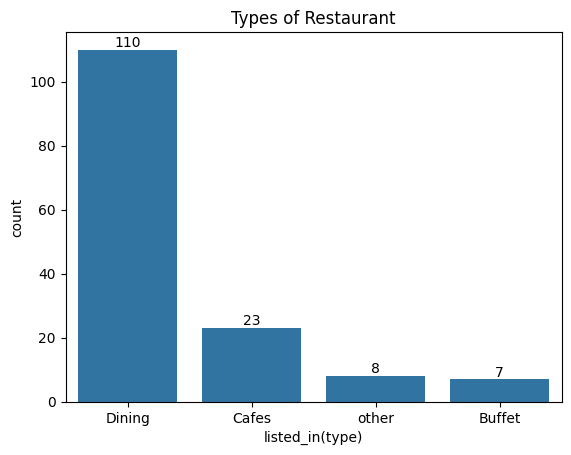

In [57]:
ax=sns.countplot(data=df,
             x='listed_in(type)',
             order=df['listed_in(type)'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Types of Restaurant')
plt.show()

Conclusion: Majority of restaurant falls in Dining category

In [33]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# 2

In [43]:
gb=df.groupby('listed_in(type)', as_index=False)['votes'].sum()
gb.columns=['listed_in(type)','Votes']

In [54]:
gb=gb.sort_values(by='Votes', ascending=False)

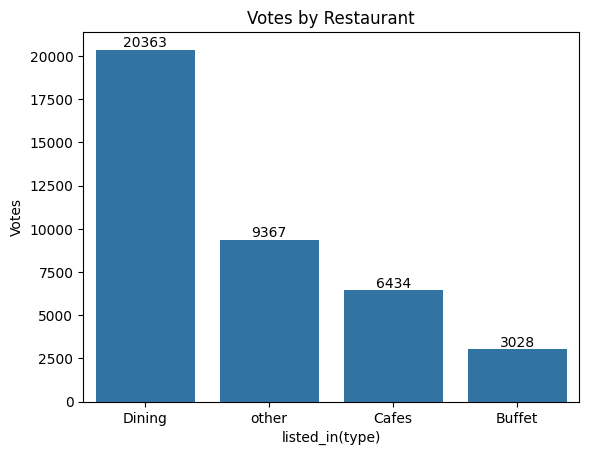

In [64]:
ax=sns.barplot(data=gb,
             x='listed_in(type)',
             y='Votes')
ax.bar_label(ax.containers[0])
plt.title('Votes by Restaurant')
plt.show()

# Conclusion: Dining restaurant has recieved maximum votes.

# 3

In [59]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [61]:
df.groupby('listed_in(type)')['rate'].sum()

listed_in(type)
Buffet     26.9
Cafes      86.6
Dining    392.9
other      31.3
Name: rate, dtype: float64

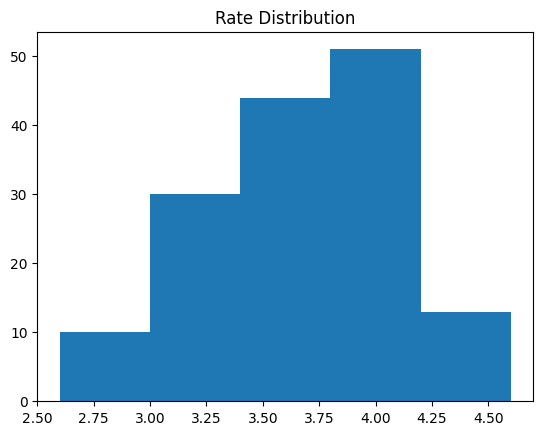

In [74]:
plt.hist(data=df,
        x='rate',
        bins=5)
plt.title('Rate Distribution')
plt.show()

# Conclusion: The majority restaurant has recieved 3.5 to 4.0

In [103]:
# 4

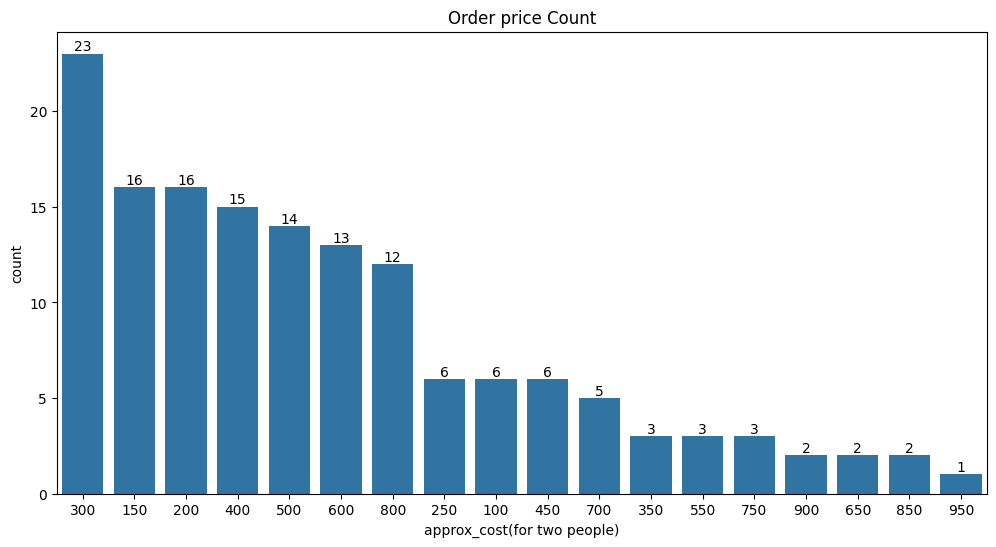

In [81]:
plt.figure(figsize=(12,6))
ax=sns.countplot(data=df,
             x='approx_cost(for two people)',
             order=df['approx_cost(for two people)'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Order price Count')
plt.show()

# Conclusion: The majority of couples prefer restaurants with aproximate cost for 300₹

# 5

<Axes: xlabel='online_order', ylabel='rate'>

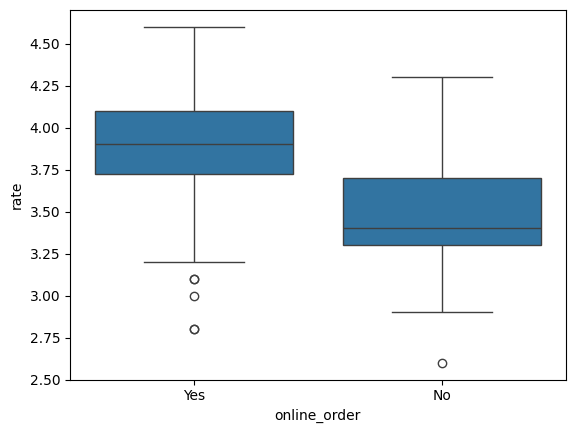

In [94]:
plt.figure(figsize(6,6))
sns.boxplot(data=df,
           x='online_order',
           y='rate')
plt.title('')

# Conclusion: Ofline order recieved lower rating in comparison to online order

# 6

In [95]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


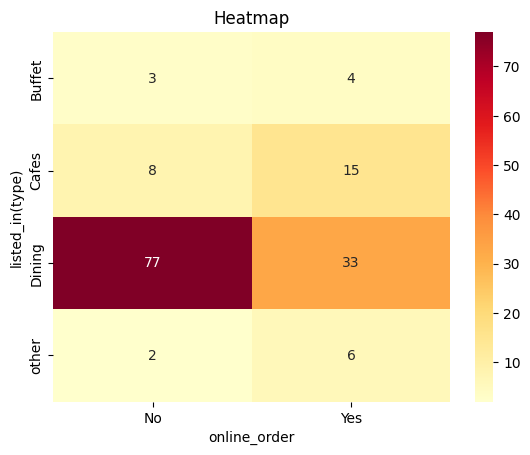

In [101]:
pivot_table=df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size')
sns.heatmap(data=pivot_table, annot=True,  fmt='d', cmap='YlOrRd')
plt.title("Heatmap"),
plt.show()

# Conclusion: Dining restaurant primarly accept offline orders, whereas Cafes restaurant recieve online orders. This suggest client prefer offline orders in person at dining restaurant but freffer online order at cafes